# Video Preprocessing

In [1]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
# change working directory to the project root directory
current_dir = os.getcwd()
os.chdir(current_dir + '/../../')
# this should be the project root directory
os.getcwd()

'/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage'

## Get Video Metadata

In [6]:
video_metadata_df = pd.read_csv('data/raw/combined/target_dataset_video_metadata(sample).csv')

### EDA

#### overall

In [7]:
video_metadata_df.data_source.value_counts()

data_source
vl    15
ne     5
sb     5
uf     5
Name: count, dtype: int64

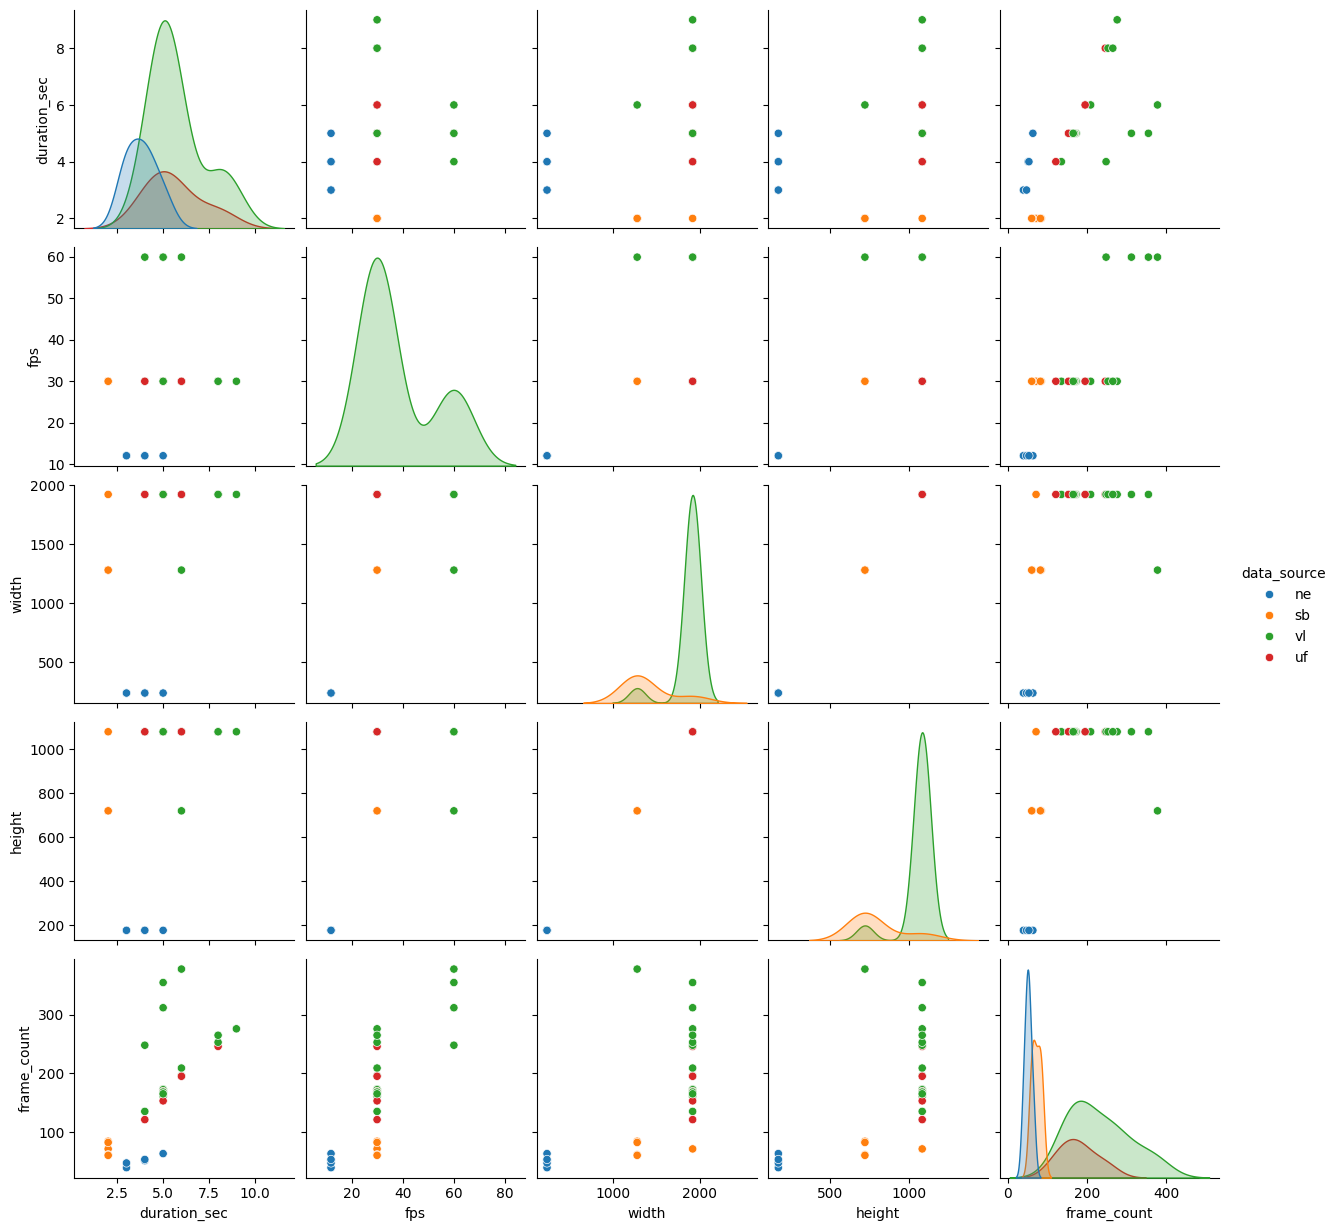

In [8]:
sns.pairplot(video_metadata_df[['duration_sec', 'fps', 'width', 'height', 'frame_count', 'data_source']], hue='data_source')
#### by data source

#### dimensions

(from the videos we have so far)
- INES are always 240x176
- SB are usually 1280x720, sometimes 1920x1080
- UF are always 1920x1080
- VL usually 1920x1080, sometimes 1280x720 or 640x352

In [9]:
video_metadata_df['dimension_str'] = video_metadata_df['width'].astype(str) + 'x' + video_metadata_df['height'].astype(str)

In [10]:
video_metadata_df.groupby('data_source').dimension_str.value_counts()

data_source  dimension_str
ne           240x176           5
sb           1280x720          4
             1920x1080         1
uf           1920x1080         5
vl           1920x1080        14
             1280x720          1
Name: count, dtype: int64

#### duration_sec

- SignBank videos are shortest
- VL videos have a wide range
    - some are even aboe 8 seconds, which is very long

<Axes: xlabel='duration_sec', ylabel='Count'>

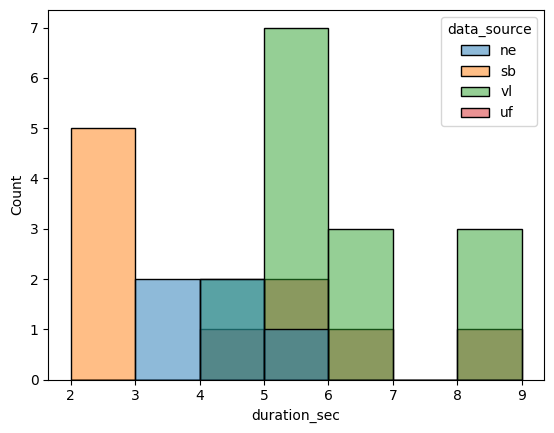

In [11]:
sns.histplot(data=video_metadata_df, x='duration_sec', hue='data_source')

<Axes: xlabel='duration_sec'>

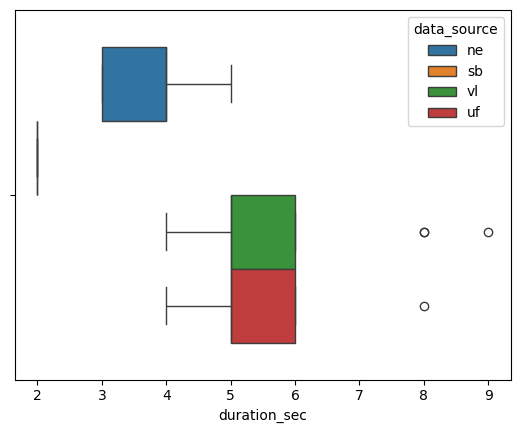

In [12]:
sns.boxplot(data=video_metadata_df, x='duration_sec', hue='data_source')

- Within VL, signer 2 tends to take longer videos

<Axes: xlabel='duration_sec'>

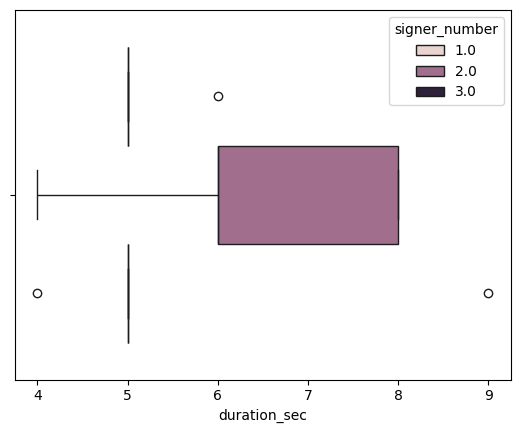

In [13]:
sns.boxplot(data=video_metadata_df[video_metadata_df['data_source'] == 'vl'], x='duration_sec', hue='signer_number')

#### FPS

- most videos are 30fps
- all INES videos are 12fps
- all SB videos are 30 fps
- V-librasil videos are either 30fps or 60fps
- all UFV videos are 30fps

<Axes: xlabel='duration_sec', ylabel='frame_count'>

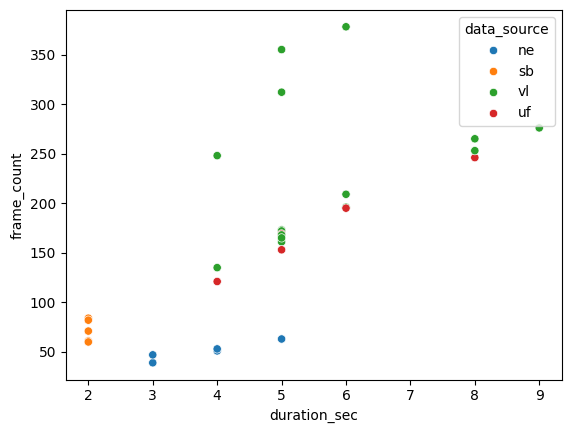

In [14]:
sns.scatterplot(data=video_metadata_df, x='duration_sec', y='frame_count', hue='data_source')

<Axes: xlabel='duration_sec', ylabel='frame_count'>

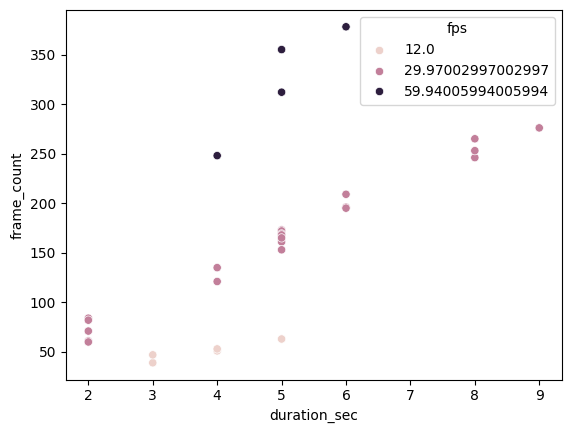

In [15]:
sns.scatterplot(data=video_metadata_df, x='duration_sec', y='frame_count', hue='fps')

- Within VL, the fps doesn't seem to depend on any factors
- within one label for VL, the 3 videos can have different fps between them
    - there doesn't seem to be any pattern for this

<Axes: xlabel='duration_sec', ylabel='frame_count'>

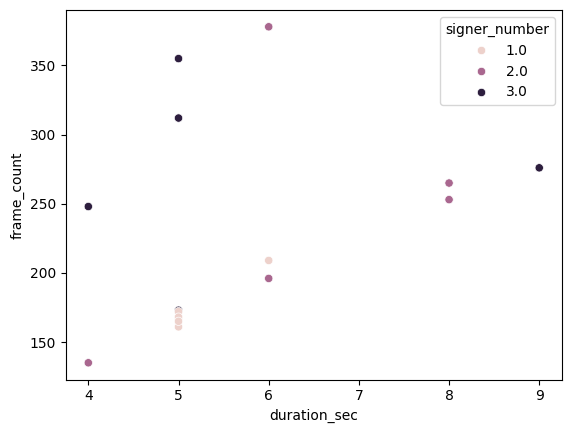

In [16]:
sns.scatterplot(data=video_metadata_df[video_metadata_df['data_source'] == 'vl'], x='duration_sec', y='frame_count', hue='signer_number')

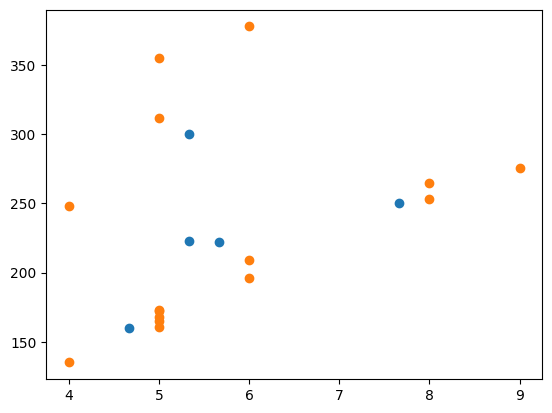

In [17]:
mean_frame_count = video_metadata_df[video_metadata_df['data_source'] == 'vl'].groupby('label').frame_count.mean().values
mean_duration_sec = video_metadata_df[video_metadata_df['data_source'] == 'vl'].groupby('label').duration_sec.mean().values
plt.scatter(mean_duration_sec, mean_frame_count)
plt.scatter(
    video_metadata_df[video_metadata_df['data_source'] == 'vl'].duration_sec, 
    video_metadata_df[video_metadata_df['data_source'] == 'vl'].frame_count
    )

<Axes: xlabel='label', ylabel='fps'>

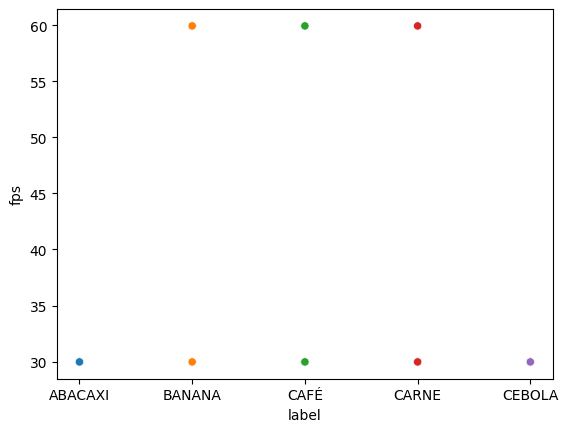

In [18]:
sns.scatterplot(data=video_metadata_df[video_metadata_df['data_source'] == 'vl'], x='label', y='fps', hue='label', legend=False)